In [1]:
!pip install tensorflow
!pip install opencv-python

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/38.1 MB 5.3 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.1 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.1 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.1 MB 16.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/38.1 MB 20.7 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.1 MB 25.9 MB/s eta 0:00:02
   ----------- ---------------------------- 10.5/38.1 MB 36.3 MB/s eta 0:00:01
   ------------- 

In [40]:
from tensorflow.keras.datasets import mnist
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #train = 훈련용 데이터, test = 훈련이 잘 됐는지 확인하는 데이터

In [42]:
type(X_train), X_train.dtype, X_train.ndim, X_train.shape, X_train.size

(numpy.ndarray, dtype('uint8'), 3, (60000, 28, 28), 47040000)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [8]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[1]

0

In [10]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf) # 컴퓨터 성능에 영향을 줄 수 있으므로 주의 할 것

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [12]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252

In [10]:
img = cv2.imread("C:\\workspace\\python\\WASSUP\\data\\car.jpg")

In [13]:
image = cv2.imread('C:\\workspace\\python\\WASSUP\\data\\car.jpg', cv2.IMREAD_ANYCOLOR) # BGR로 인식하므로 컨버팅 필요
image[:3]

array([[[236, 238, 219],
        [236, 238, 219],
        [236, 238, 219],
        ...,
        [119, 125,  72],
        [103, 118,  61],
        [100, 119,  62]],

       [[237, 239, 220],
        [236, 238, 219],
        [236, 238, 219],
        ...,
        [125, 131,  76],
        [103, 118,  61],
        [ 86, 106,  47]],

       [[237, 239, 220],
        [237, 239, 220],
        [237, 239, 220],
        ...,
        [119, 125,  68],
        [103, 117,  59],
        [ 87, 105,  44]]], dtype=uint8)

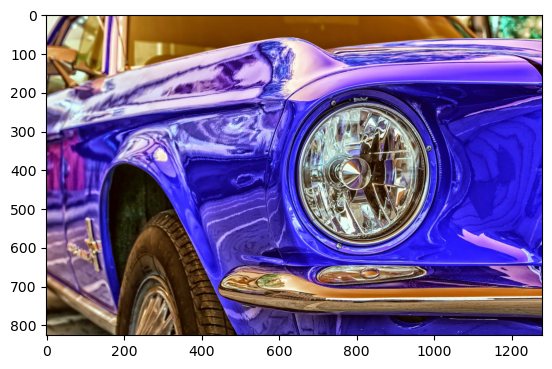

In [14]:
plt.imshow(image)

In [16]:
def imginfo(image):
    print(type(image), image.dtype, image.ndim, image.shape, image.size)

<class 'numpy.ndarray'> uint8 3 (826, 1280, 3) 3171840


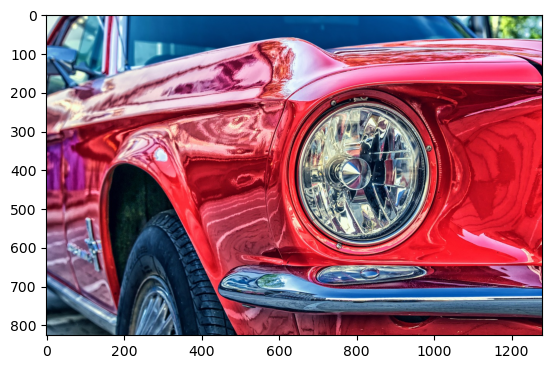

In [18]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB로 컨버팅
plt.imshow(image)
# plt.show()# 객체 디스크립션 숨김
imginfo(image)

<class 'numpy.ndarray'> uint8 2 (826, 1280) 1057280


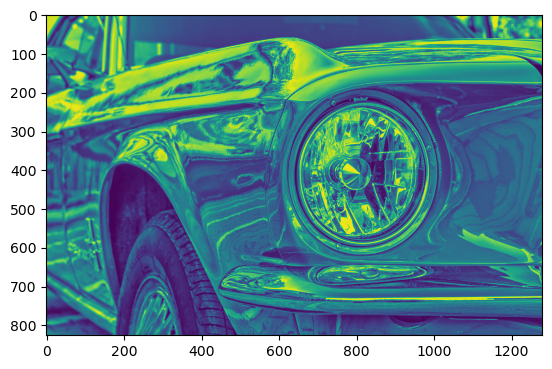

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
imginfo(gray)

<class 'numpy.ndarray'> uint8 3 (826, 1280, 3) 3171840


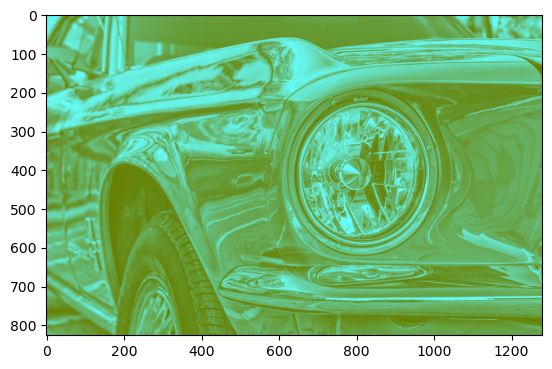

In [20]:
im_color = cv2.applyColorMap(gray, cv2.COLORMAP_SUMMER)
plt.imshow(im_color)
imginfo(im_color)

<class 'numpy.ndarray'> uint8 3 (826, 1280, 3) 3171840


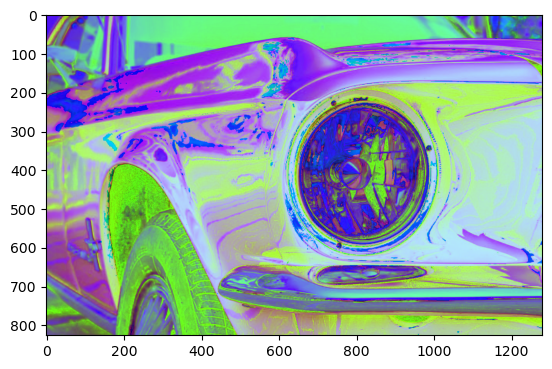

In [21]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
imginfo(hsv)

In [22]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 200, 100]) 

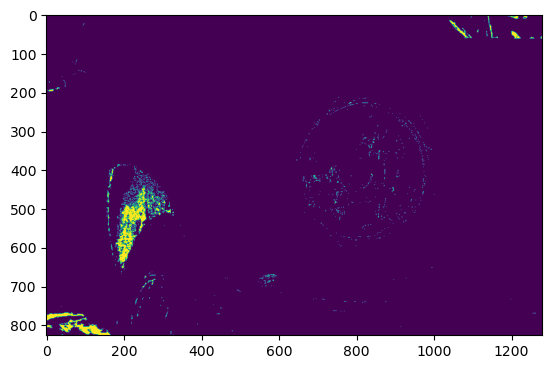

In [23]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 200, 100])

mask_green = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask_green)

In [24]:
height, width, channel = image.shape
height, width, channel

(826, 1280, 3)

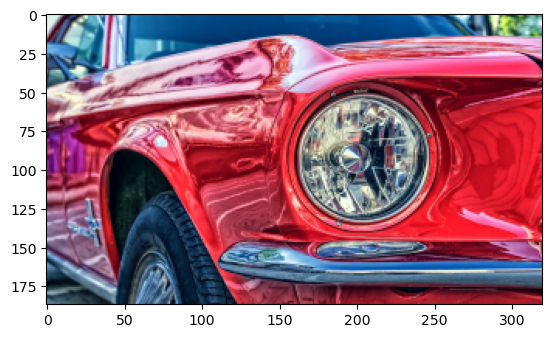

In [25]:
dst = cv2.resize(image, dsize=(320,187), interpolation=cv2.INTER_AREA) #interpolation 보간
plt.imshow(dst)

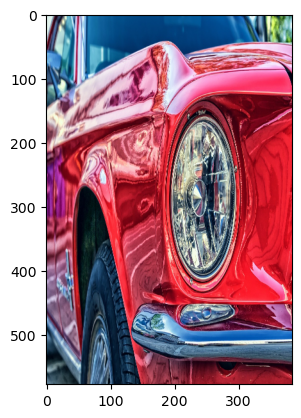

In [26]:
dst = cv2.resize(image, dsize=(0,0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR) # X축기준으로 30%, Y축 기준으로 70% 크기 조절, dzie(0,0)하면 비율 적용
plt.imshow(dst)

<class 'numpy.ndarray'> uint8 3 (1652, 2560, 3) 12687360


<function matplotlib.pyplot.show(close=None, block=None)>

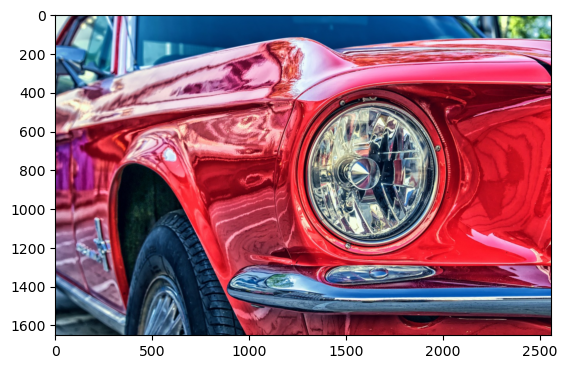

In [27]:
# 확대, 축소
dst3 = cv2.pyrUp(image, dstsize=(width*2, height*2))
plt.imshow(dst3)
imginfo(dst3)
plt.show

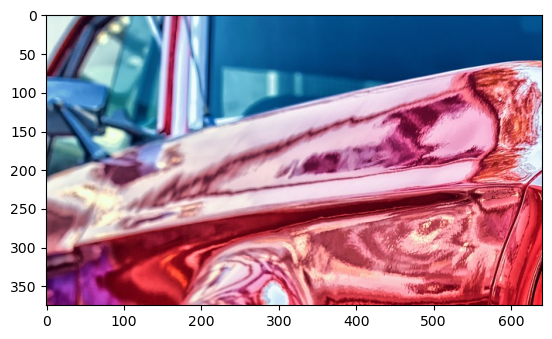

In [28]:
dst5 = image[:375, :641]
plt.imshow(dst5)

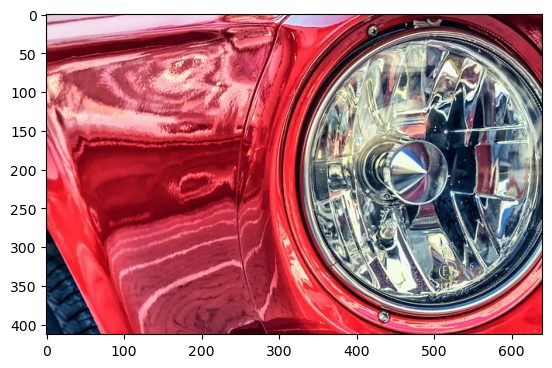

In [29]:
dst6 = image[int(height/2-height/4) : int(height/2+height/4),         # y 범위
             int(width/2-width/4)  : int(width/2+width/4)] # x범위
plt.imshow(dst6)

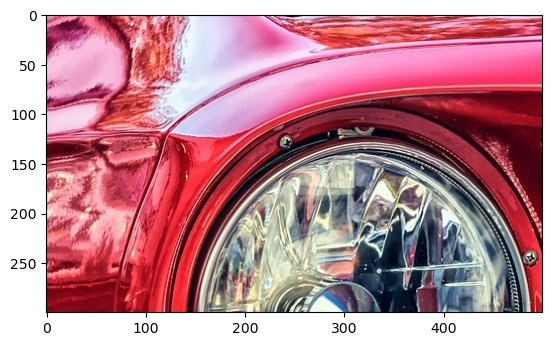

In [50]:
import tensorflow as tf
# IMAGE CROP
dst14 = tf.image.crop_to_bounding_box(image, 100, 500, 300, 500) # BOX좌표 
# offset_height(위에서 아래로 +100), offset_width(좌에서 우방향으로 +200), target_height(offset지점에서부터 높이+300), target_width(offset지점부터 +400)
plt.imshow(dst14)

In [32]:
rows, cols, channels = img.shape
img.shape

(826, 1280, 3)

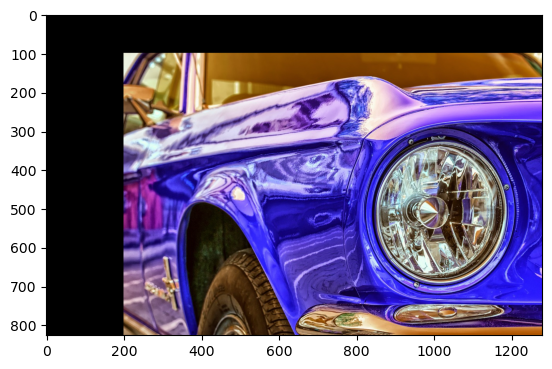

In [33]:
rows, cols, channels = img.shape

m = np.float32([[1,0,200],[0,1,100]]) # [x축 True, y축 false, 이동 200 ], [x축 false, y축 True, 이동 100]

dst = cv2.warpAffine(img, m, (cols,rows))

plt.imshow(dst)

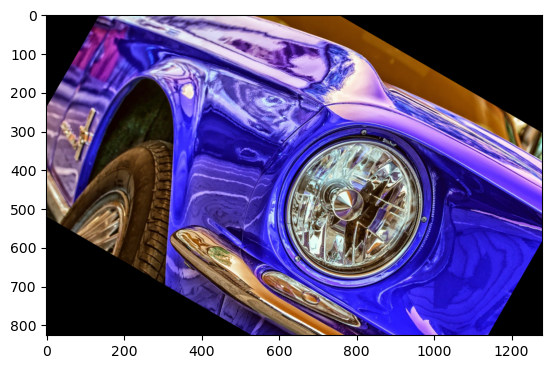

In [34]:
# 중심점에서 30도 시계방향
M = cv2.getRotationMatrix2D((cols/2, rows/2), -30, 1) 

rotate_30 = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(rotate_30)

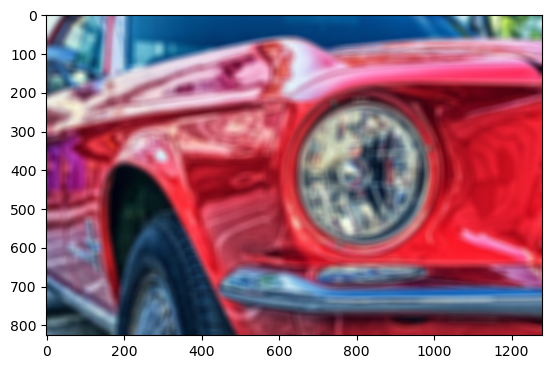

In [36]:
dst7 = cv2.blur(image, (20, 20)) # 값이 커질수록 더 흐려짐 , 필터의 컨벌루션
plt.imshow(dst7)

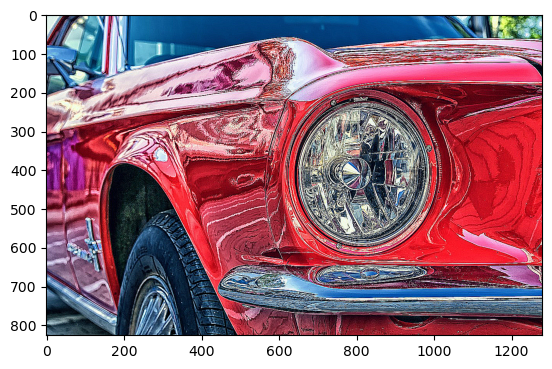

In [38]:
# 중앙값을 키워주는 형태의 마스크를 만든 후 적용하여 특징을 강조
# sharpening ; 주변 pixel과의 차이를 극대화시켜 경계부분의 명암비를 증가시키는 작업
# 주변부의 픽셀값을 감소시킬때, 강조될 강도를 mask중앙에 지정하고  주변부의 값을 줄여 총합이 1이 되도록 mask 생성
kernel = np.array([ [-1, -1, -1], [-1, 9, -1], [-1, -1, -1]    ]) # 필터 ,
dst8 = cv2.filter2D(image, -1, kernel) #두번쨰 인자인 ddepth은 출력영상의 데이터타입으로 default는 -1로 입력과 동일한 타입으로 출력
plt.imshow(dst8)

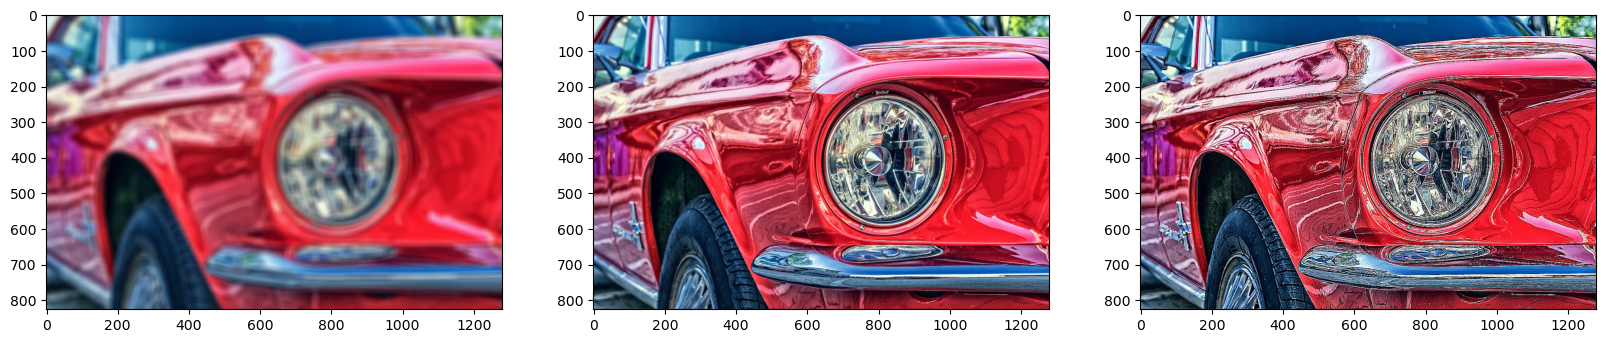

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
ax[0].imshow(dst7)
ax[1].imshow(image)
ax[2].imshow(dst8)

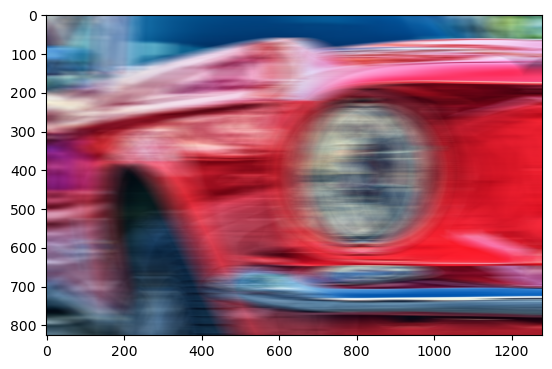

In [63]:
dst7 = cv2.blur(image, (100, 1)) # 값이 커질수록 더 흐려짐 , 필터의 컨벌루션
plt.imshow(dst7)